# 1.Import data and modules

In [105]:
#製圖與陣列
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#取消python警告
import warnings
warnings.filterwarnings('ignore')

#數學相關
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import skew
from math import sqrt

%matplotlib inline
pd.set_option('display.max_columns', 300)

In [106]:
#讀入CSV檔
df_train = pd.read_csv('train.csv', index_col="Id")
df_test = pd.read_csv('test.csv', index_col="Id")

#將SalesPrice獨立出來預測
y_train = df_train.SalePrice
df_train = df_train.drop(columns='SalePrice')

#查看資料(數字與物件)
print(len(df_train._get_numeric_data().columns))
print(len(df_train.select_dtypes(include='object').columns))

36
43


In [107]:
#查看頭五項資料
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [108]:
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# 2 Data Preprocessing

## 2.1 Missing Data 處理

此資料及有許多的遺漏值，需要做填補或做拋棄的動作，以下有一些可能性與結論：

- NaNs值並非遺漏值(missing values)，它意味著這個房子沒有此features，因此可用"None"來代替這個項目

- 數值NaN確實是缺失值，並且用該特定特徵的均值估算。

- 一個特殊的案例是LotFrontage，通過使用相應鄰域的平均值來估算我所估算的特徵的平均值。

### 2.1.1查看缺失值

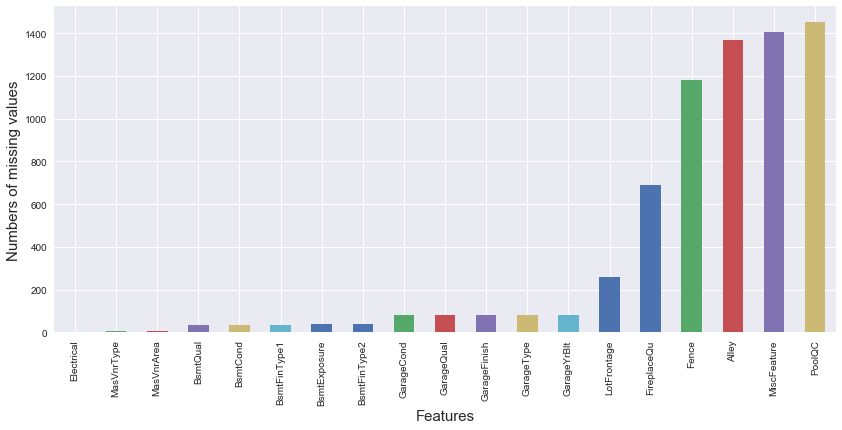

In [109]:
#以條狀圖畫出缺失值
_, axes = plt.subplots(figsize=(14, 6))
#將缺失值加總起來並畫出
missing = df_train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Numbers of missing values', fontsize=15)
missing.plot.bar()

### 2.1.2 Imputing Categorical Features

In [110]:
#載入物件
categorical_features = df_train.select_dtypes(include='object').columns
#填入None
df_train[categorical_features] = df_train[categorical_features].fillna('None')
df_test[categorical_features] = df_test[categorical_features].fillna('None')

### 2.1.3 Imputing Numerical Features

In [111]:
from sklearn.preprocessing import Imputer

# 將NaN替換為相應的鄰近中位數
df_train["LotFrontage"] = df_train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
df_test["LotFrontage"] = df_test.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
    
# 將NaN替換為Feature Median
numerical_features = df_train.select_dtypes(include='number').columns
my_imputer = Imputer()
df_train[numerical_features] = my_imputer.fit_transform(df_train[numerical_features])
df_test[numerical_features] = my_imputer.transform(df_test[numerical_features])

## 2.2 Categorical Encoding
對分類特徵進行編碼，並對分類的數值特徵進行分解，以下有一些可能性與結論：
- 我們加入訓練集和測試集，以保證它們具有相同的維度，因為如果其中一個數據集具有另一個沒有的類別，那麼One-hot encoding會輸出具有不同維度的rain and test集並會破壞模型
- 有一些數字特徵使得更多作為分類，因此它們被轉換為string
- 在類別中沒有順序關係的分類特徵是one-hot encoded

### 2.2.1 Train-Test Join

In [112]:
idx_split = df_train.shape[0]
df_train = df_train.append(df_test)

### 2.2.2 Factorizing(拆解資料集)

In [113]:
#類別為數字項的資料
NumStr = ["MSSubClass","BsmtFullBath","BsmtHalfBath","HalfBath",
          "BedroomAbvGr","KitchenAbvGr","MoSold","YrSold","YearBuilt",
          "YearRemodAdd","LowQualFinSF","GarageYrBlt"]
for col in NumStr:
    df_train[col]=df_train[col].astype(str)
    
#類別為非數字項的資料
non_ordinal_features = ['LandSlope','Utilities','MSZoning', 'Street','Alley',
                        'LotShape','LandContour','LotConfig','Neighborhood',
                        'Condition1','Condition2','BldgType','HouseStyle', 
                        'RoofStyle','RoofMatl','Exterior1st', 'Exterior2nd',
                        'MasVnrType','Foundation', 'BsmtExposure',
                        'BsmtFinType1','BsmtFinType2', 'Heating', 'CentralAir', 
                        'Electrical','Functional', 'GarageType','GarageFinish',
                        'PavedDrive', 'Fence','MiscFeature','SaleType',
                        'SaleCondition', "MSSubClass","BsmtFullBath",
                        "BsmtHalfBath","HalfBath","BedroomAbvGr",
                        "KitchenAbvGr","MoSold","YrSold","YearBuilt",
                        "YearRemodAdd","LowQualFinSF","GarageYrBlt"]
#將非數字項的資料drop
ordinal_features = df_train.select_dtypes(include='object').columns.drop(non_ordinal_features)

### 2.2.3 Non-Ordinal Variables(非次序變項)

In [114]:
#整理數字項欄位
dummies = pd.get_dummies(df_train.loc[:,non_ordinal_features], drop_first=True)
df_train = pd.concat([df_train,dummies], axis=1)
df_train = df_train.drop(non_ordinal_features,axis=1)
#印出df_train
df_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,LandSlope_Mod,LandSlope_Sev,Utilities_NoSeWa,Utilities_None,MSZoning_FV,MSZoning_None,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_None,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_None,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,...,YearRemodAdd_1999.0,YearRemodAdd_2000.0,YearRemodAdd_2001.0,YearRemodAdd_2002.0,YearRemodAdd_2003.0,YearRemodAdd_2004.0,YearRemodAdd_2005.0,YearRemodAdd_2006.0,YearRemodAdd_2007.0,YearRemodAdd_2008.0,YearRemodAdd_2009.0,YearRemodAdd_2010.0,LowQualFinSF_1064.0,LowQualFinSF_108.0,LowQualFinSF_114.0,LowQualFinSF_120.0,LowQualFinSF_140.0,LowQualFinSF_144.0,LowQualFinSF_156.0,LowQualFinSF_205.0,LowQualFinSF_232.0,LowQualFinSF_234.0,LowQualFinSF_259.0,LowQualFinSF_312.0,LowQualFinSF_360.0,LowQualFinSF_362.0,LowQualFinSF_371.0,LowQualFinSF_384.0,LowQualFinSF_390.0,LowQualFinSF_392.0,LowQualFinSF_397.0,LowQualFinSF_420.0,LowQualFinSF_431.0,LowQualFinSF_436.0,LowQualFinSF_450.0,LowQualFinSF_473.0,LowQualFinSF_479.0,LowQualFinSF_481.0,LowQualFinSF_512.0,LowQualFinSF_513.0,LowQualFinSF_514.0,LowQualFinSF_515.0,LowQualFinSF_528.0,LowQualFinSF_53.0,LowQualFinSF_572.0,LowQualFinSF_697.0,LowQualFinSF_80.0,GarageYrBlt_1896.0,GarageYrBlt_1900.0,GarageYrBlt_1906.0,GarageYrBlt_1908.0,GarageYrBlt_1910.0,GarageYrBlt_1914.0,GarageYrBlt_1915.0,GarageYrBlt_1916.0,GarageYrBlt_1917.0,GarageYrBlt_1918.0,GarageYrBlt_1919.0,GarageYrBlt_1920.0,GarageYrBlt_1921.0,GarageYrBlt_1922.0,GarageYrBlt_1923.0,GarageYrBlt_1924.0,GarageYrBlt_1925.0,GarageYrBlt_1926.0,GarageYrBlt_1927.0,GarageYrBlt_1928.0,GarageYrBlt_1929.0,GarageYrBlt_1930.0,GarageYrBlt_1931.0,GarageYrBlt_1932.0,GarageYrBlt_1933.0,GarageYrBlt_1934.0,GarageYrBlt_1935.0,GarageYrBlt_1936.0,GarageYrBlt_1937.0,GarageYrBlt_1938.0,GarageYrBlt_1939.0,GarageYrBlt_1940.0,GarageYrBlt_1941.0,GarageYrBlt_1942.0,GarageYrBlt_1943.0,GarageYrBlt_1945.0,

### 2.2.4 Ordinal Variables(次序變項)

In [115]:
#定義序列
def cat_to_num(x):
    if x=='Ex':
        return 5
    if x=='Gd':
        return 4
    if x=='TA':
        return 3
    if x=='Fa':
        return 2
    if x=='Po':
        return 1
    if x=='None':
        return 0

df_train.loc[:,ordinal_features] = df_train.loc[:,ordinal_features].applymap(cat_to_num)

### 2.2.5 Train-Test SplitI(切分)

In [116]:
X = df_train.loc[:idx_split, :]
X_test = df_train.loc[idx_split+1:, :]

# 3 Exploratory Data Analysis

## 3.1 Predictors-Target Join 
如果預測變量和標籤位於同一dataframe中，則更容易進行EDA

In [117]:
X = X.assign(SalePrice=y_train)

## 3.2 Target Variable
目標變量是正確的因為昂貴的房子是罕見的。 分佈不均可能會對模型性能產生負面影響，因此會在數據清理期間處理這個問題

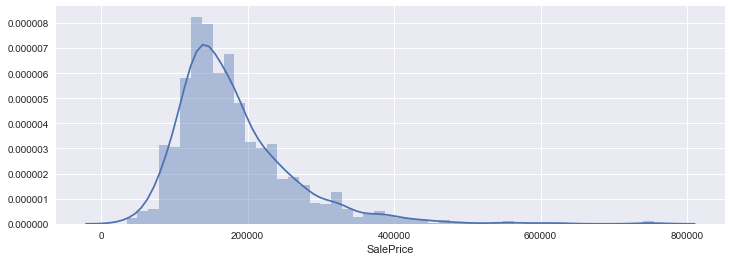

In [118]:
#建立分佈圖
sns.set()
_, axes = plt.subplots(figsize=(12, 4))
sns.distplot(X.SalePrice)

## 3.3 Correlation Analysis(相關分析)
### 3.3.1 General Correlation
相互之間存在高度相關的特徵，這可能會在建模階段產生多線性，以下是一些麻煩的特徵：
- GarageCars和GarageArea高度相關。
- PoolQC和PoolArea高度相關。
- 壁爐和FireplaceQu高度相關。
- GarageCond和GarageCond高度相關

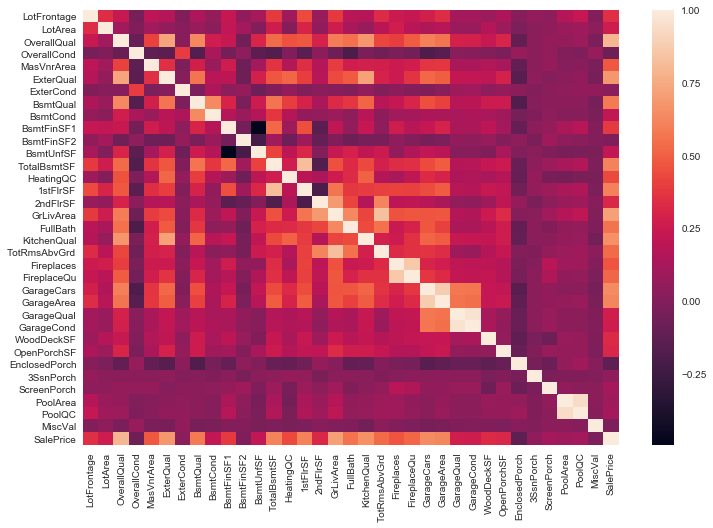

In [119]:
#繪製混淆矩陣查看其關聯性
_, ax = plt.subplots(ncols=1, figsize=(12,8))
corr_matrix = X.drop(dummies,axis=1).corr()
sns.heatmap(corr_matrix);

### 3.3.2 Correlation with Target
以上述的混淆矩陣之中挑選了10個最有相關性的特徵，以了解哪個可能是最好的預測因子。

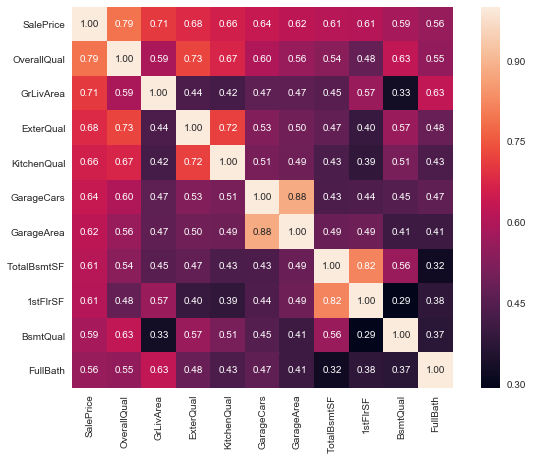

In [120]:
_, ax = plt.subplots(ncols=1, figsize=(10,7))
cols = corr_matrix.nlargest(11, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(X[cols].values.T)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

## 3.4 Numerical Features(數值特徵)
繪製數值特徵以便理解它們的分佈
- 在大多數數字特徵中都有一些異常值，實際上它們對於所有特徵都是相同的點。 這確實是不需要的異常值，如數據集描述中所示，因此它們會被刪除。

### 3.4.1 OverallQual

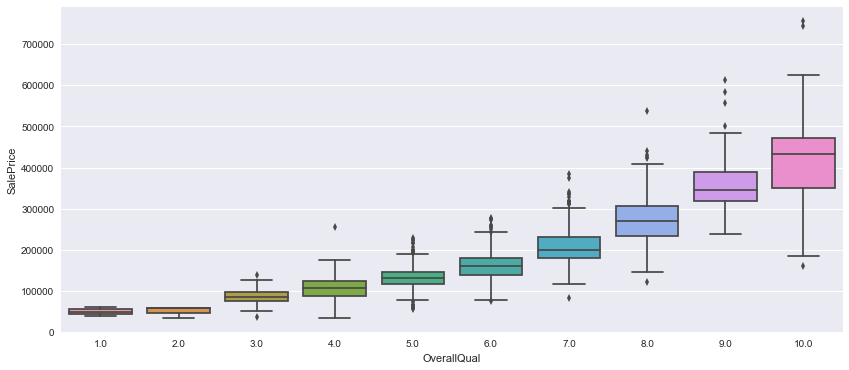

In [121]:
#繪製OverallQual box分布圖
_, axes = plt.subplots(figsize=(14, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=X)

### 3.4.2 GrLivArea

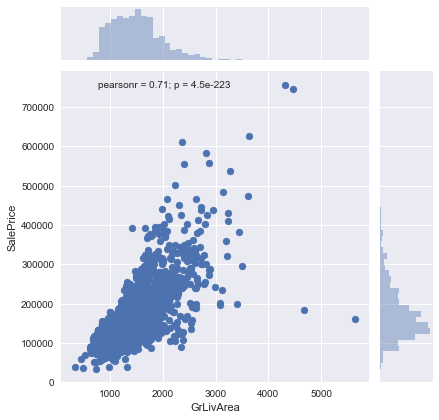

In [122]:
#繪製GrLivArea jointplot
sns.set()
sns.jointplot(kind='scatter',data=X, x='GrLivArea', y='SalePrice')

### 3.4.3 TotalBsmtSF

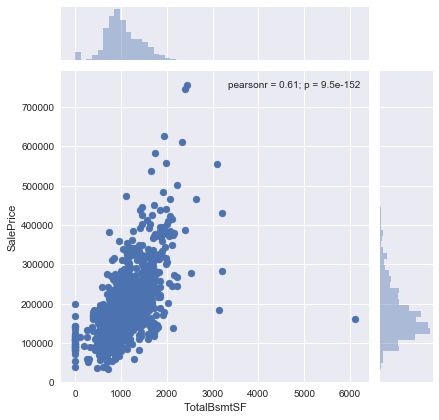

In [123]:
#繪製TotalBsmtSF jointplot
sns.set()
sns.jointplot(kind='scatter',data=X, x='TotalBsmtSF', y='SalePrice')

### 3.4.4  1stFlrSF

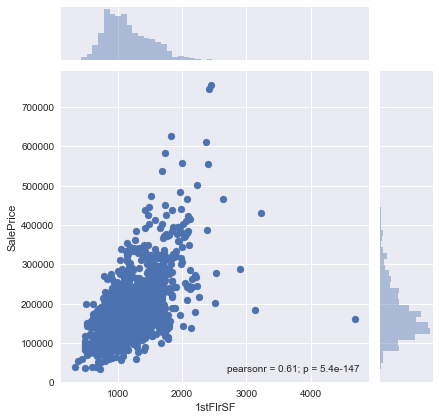

In [124]:
#繪製 1stFlrSF jointplot
sns.set()
sns.jointplot(kind='scatter',data=X, x='1stFlrSF', y='SalePrice')

## 3.5 Predictors-Target Split
再次drop掉SalePrice，由於不想讓此項影響模型的建置

In [125]:
X = X.drop(columns='SalePrice')

# 4 Feature Engineering(特徵工程)

設計一些額外的功能來幫助我們的模型理解它們之間的關係

In [126]:
#TotalHouse ＝ 房屋的總面積
#TotalHouse_OverallQual = 房子的總面積乘以整體質量
#GrLivArea_OverallQual不包括地下室的房屋面積乘以整體質量

X["TotalHouse"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"]   
X["TotalHouse_OverallQual"] = X["TotalHouse"] * X["OverallQual"]
X["GrLivArea_OverallQual"] = X["GrLivArea"] * X["OverallQual"]

#將測試資料也做此特徵工程
X_test["TotalHouse"] = X_test["TotalBsmtSF"] + X_test["1stFlrSF"] + X_test["2ndFlrSF"]   
X_test["TotalHouse_OverallQual"] = X_test["TotalHouse"] * X_test["OverallQual"]
X_test["GrLivArea_OverallQual"] = X_test["GrLivArea"] * X_test["OverallQual"]

# 5 Data Cleaning(數據清理)
- 刪除了先前檢測到的異常值
- 偏斜度大於0.75的所有特徵都是boxcox變換的
- 之前確定的四個多線性特徵被刪除
- 所有功能都使用MinMaxScaling進行縮放，因為與Standard和Robust相比，它提供了更好的結果

## 5.1 Handling Outliers(處理異常數)

In [127]:
#處理異常數並將值介定於一定區間內
print(X[(X['GrLivArea']>4000) & (y_train<300000)].index)
X = X.drop(X[(X['GrLivArea']>4000) & (y_train<300000)].index)
y_train = y_train.drop([524, 1299])

Int64Index([524, 1299], dtype='int64', name=u'Id')


## 5.2 Feature Normalization(正規化)

In [128]:
numeric_feats = X.dtypes[X.dtypes != "object"].index
numeric_feats = numeric_feats.drop(dummies)
numeric_feats = numeric_feats.drop(ordinal_features)

skewed_feats = X[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness = skewness[abs(skewness) > 0.75]

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    X[feat] = boxcox1p(X[feat], lam)
    X_test[feat] = boxcox1p(X_test[feat], lam)

In [129]:
#計算y_trian並印出
y_train = np.log(y_train)
y_train.head()

Id
1    12.247694
2    12.109011
3    12.317167
4    11.849398
5    12.429216
Name: SalePrice, dtype: float64

## 5.3 Avoiding Multicollinearity(避免多重共線性)

In [130]:
multicol_features = ['GarageCars', 'PoolQC', 'FireplaceQu', 'GarageCond']

#將有可能產生多重共線性的特徵移除
X = X.drop(multicol_features, axis = 1)
X_test = X_test.drop(multicol_features, axis = 1)

## 5.4 Feature Scaling(特徵平滑化)

In [131]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X)

X[X.columns] = scaler.transform(X[X.columns])
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

# 6 Modelling


## 6.1 Lasso Regression


In [134]:
#建立Lasso模型並import相關資料
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_log_error
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_log_error

rgr_ls = Lasso(fit_intercept = True)
#設定alpha值
param_grid = {
    "alpha": [0.0002, 0.0003, 0.0005, 0.0008, 0.001]
}
searchCV = GridSearchCV(rgr_ls, cv=5, param_grid=param_grid, scoring='neg_mean_squared_error')
#導入資料並進行訓練
searchCV.fit(X, y_train)
#印出其score
np.sqrt(searchCV.best_score_*-1)

0.11746835128312841

Text(0.5,1,'Coefficients with magnitude greater than 0.03')

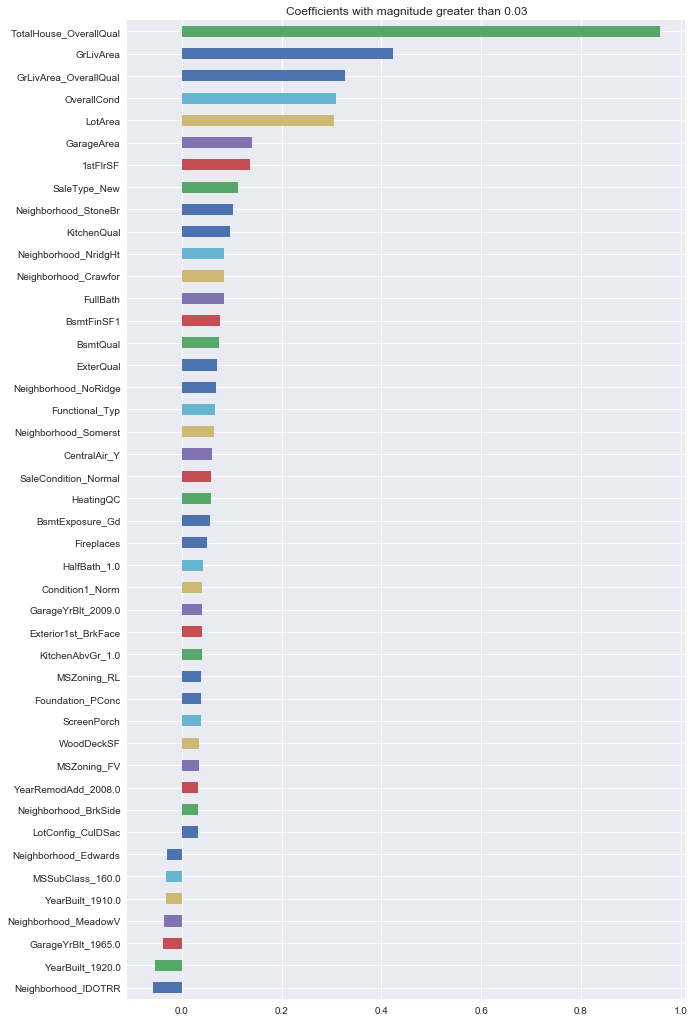

In [135]:
lasso = searchCV.best_estimator_
coefs = pd.Series(lasso.coef_,index=X.columns)

plt.figure(figsize=(10,18))
coefs[coefs.abs()>0.03].sort_values().plot.barh()

#將相關係數大於0.03的印出
plt.title('Coefficients with magnitude greater than 0.03')

## 6.2 Model Submission (建立submission檔案)

In [138]:
#建立submission檔案
y_test_pred = searchCV.predict(X_test)
y_test_pred = np.exp(y_test_pred)
my_submission = pd.DataFrame({'Id': X_test.index.astype(int), 'SalePrice': y_test_pred})
my_submission.to_csv('submission.csv', index=False)

In [139]:
#將產生出來的結果讀入並印出
submission = pd.read_csv('submission.csv', encoding = "utf-8", dtype = {'type': np.int32})
submission

,Id,SalePrice
0,1461,116645.519094
1,1462,167131.962632
2,1463,182771.946585
3,1464,200566.676845
4,1465,197812.870044
5,1466,167905.753991
6,1467,172064.778867
7,1468,159516.886213
8,1469,208238.197806
9,1470,117077.078695


## Kaggle排名

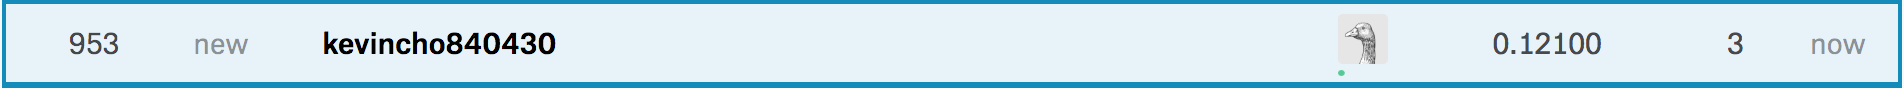

In [143]:
#導入 image函數
from IPython.display import Image
Image(filename='grade.png')